In [4]:
import pandas as pd

In [6]:
yelp = pd.read_csv('yelp.csv')

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [9]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [12]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
yelp['text length'] = yelp['text'].apply(len)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

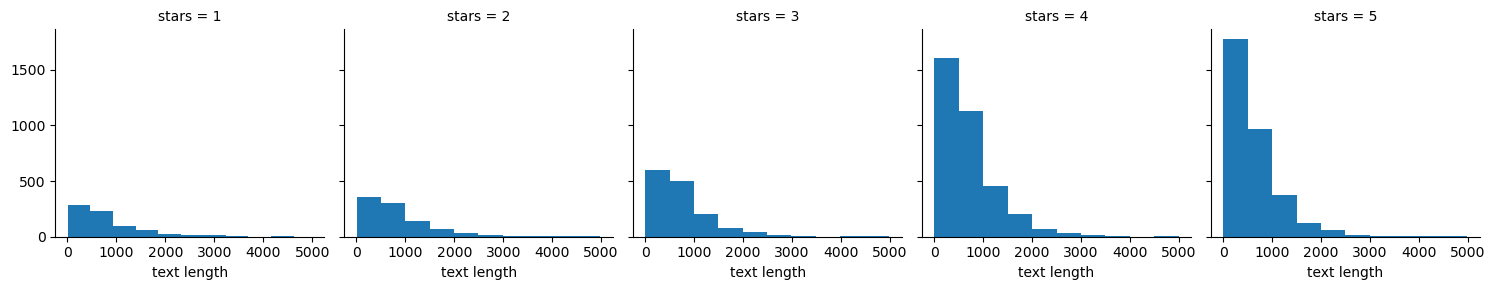

In [17]:
sns.FacetGrid(yelp,col='stars').map(plt.hist,'text length')

<Axes: xlabel='stars', ylabel='text length'>

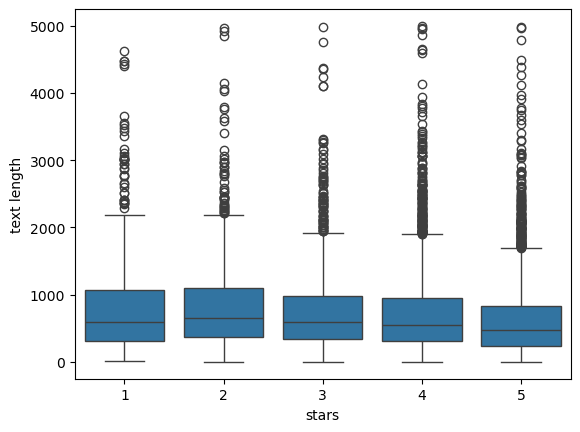

In [19]:
sns.boxplot(data=yelp,x='stars',y='text length')

<Axes: xlabel='stars', ylabel='count'>

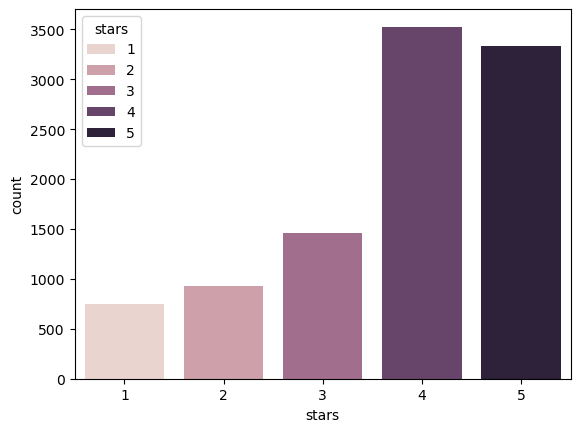

In [21]:
sns.countplot(data=yelp,x='stars',hue='stars')

In [23]:
stars = yelp.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [25]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

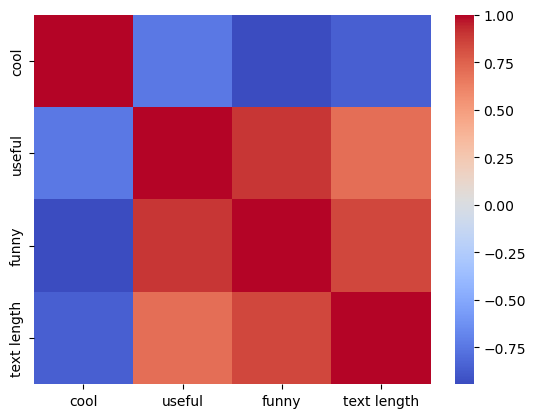

In [27]:
sns.heatmap(data=stars.corr(),cmap='coolwarm')

In [29]:
yelp_class = yelp[(yelp['stars'] == 1)  | (yelp['stars'] == 5)]

In [31]:
X,y = yelp_class['text'],yelp_class['stars']

In [32]:
'''from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample documents
documents = [
    "I love machine learning",
    "I love data science",
    "Machine learning is fascinating"
]

# Create and apply the vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Convert to a DataFrame for better visualization
df = pd.DataFrame(X.toarray(), columns=vocabulary)
print(df)
'''

'from sklearn.feature_extraction.text import CountVectorizer\nimport pandas as pd\n\n# Sample documents\ndocuments = [\n    "I love machine learning",\n    "I love data science",\n    "Machine learning is fascinating"\n]\n\n# Create and apply the vectorizer\nvectorizer = CountVectorizer()\nX = vectorizer.fit_transform(documents)\n\n# Get the vocabulary\nvocabulary = vectorizer.get_feature_names_out()\n\n# Convert to a DataFrame for better visualization\ndf = pd.DataFrame(X.toarray(), columns=vocabulary)\nprint(df)\n'

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow = CountVectorizer()

In [37]:
X = bow.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
nb = MultinomialNB().fit(X_train,y_train)

In [46]:
pred = nb.predict(X_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(confusion_matrix(y_test,pred))

[[159  69]
 [ 22 976]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

In [59]:
X, y = yelp_class['text'], yelp_class['stars']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])


In [65]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [66]:
pred_p = pipeline.predict(X_test)

In [123]:
print(confusion_matrix(y_test,pred))

[[159  69]
 [ 22 976]]


In [67]:
print(classification_report(y_test,pred_p))

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

